## Supervised Learning – Logistic Regression on a Iris dataset

The objective of this notebook is to create a classifier that will predict whether an iris belongs to the ‘Iris-setosa' class or not.


In [247]:
# Import Libraries
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sci-kit learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [248]:
# Import the data
df = pd.read_csv("Iris.csv")
df.info() #There are some NANs
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Get the general ideas about the columns

In [249]:
df.shape

(150, 6)

In [250]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Check duplicated rows

In [251]:
# Check any duplicated rows
print(df.duplicated().any())

False


### Data Preprocessing

In [252]:
#Checking the columns with categorical values.
object_columns = df.columns[df.dtypes == 'object']
object_columns

Index(['Species'], dtype='object')

In [253]:
# Encode categorical features using one-hot encoding for nominal variables
# data = pd.get_dummies(data, columns=object_columns, drop_first=True)
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(df[object_columns]).toarray()

data_encoded_df = pd.DataFrame(
    data_encoded, columns=encoder.get_feature_names_out()
)

df.drop(object_columns, axis=1, inplace=True)

df = pd.concat([df, data_encoded_df], axis=1)

In [254]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,1.0,0.0,0.0


### Feature Selection

Variable Id is dropped as the record Id will not contribute any information to the training.

The task is to create a classifier that will predict whether an iris belongs to the ‘Iris-setosa' class or not. Therefore, the feature Species_Iris-setosa will be used as the dependent variable. The other variables are used as independent variables.

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0            5.1           3.5            1.4           0.2   
1            4.9           3.0            1.4           0.2   
2            4.7           3.2            1.3           0.2   
3            4.6           3.1            1.5           0.2   
4            5.0           3.6            1.4           0.2   

   Species_Iris-setosa  
0                  1.0  
1                  1.0  
2                  1.0  
3                  1.0  
4                  1.0  


<Axes: >

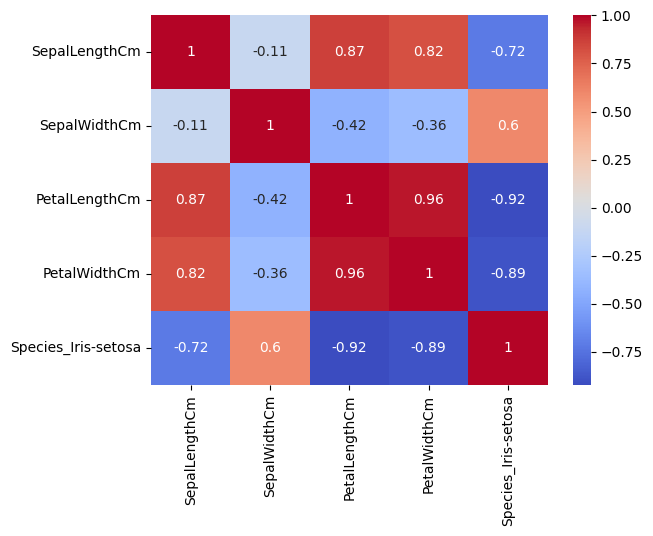

In [255]:
df.drop('Id', axis=1, inplace=True)

df_corr = df.iloc[:, [0,1,2,3,4]]
print(df_corr.head())
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')

### Training and test samples

In [256]:
# Feature matrix and target vector
X_feature = df.iloc[:,0:4].values
print(X_feature[:5])

y_target = df.iloc[:,4].values  # 4 is Species_Iris-setosa
y_target = y_target.reshape(-1, 1)
print(y_target[:5])

# Split the dataset into training and testing sets by 80%/20%
# Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42, shuffle=True)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [257]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### Feature Scaling

Consider the values among the independent variables, the ranges of PetalWidthCm and SepalWidthCm are half ranges of SepalLengthCm and PetalLengthCm. Then feature scaling is required for training regression model to compare easily and accurately and less bias.

In [258]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


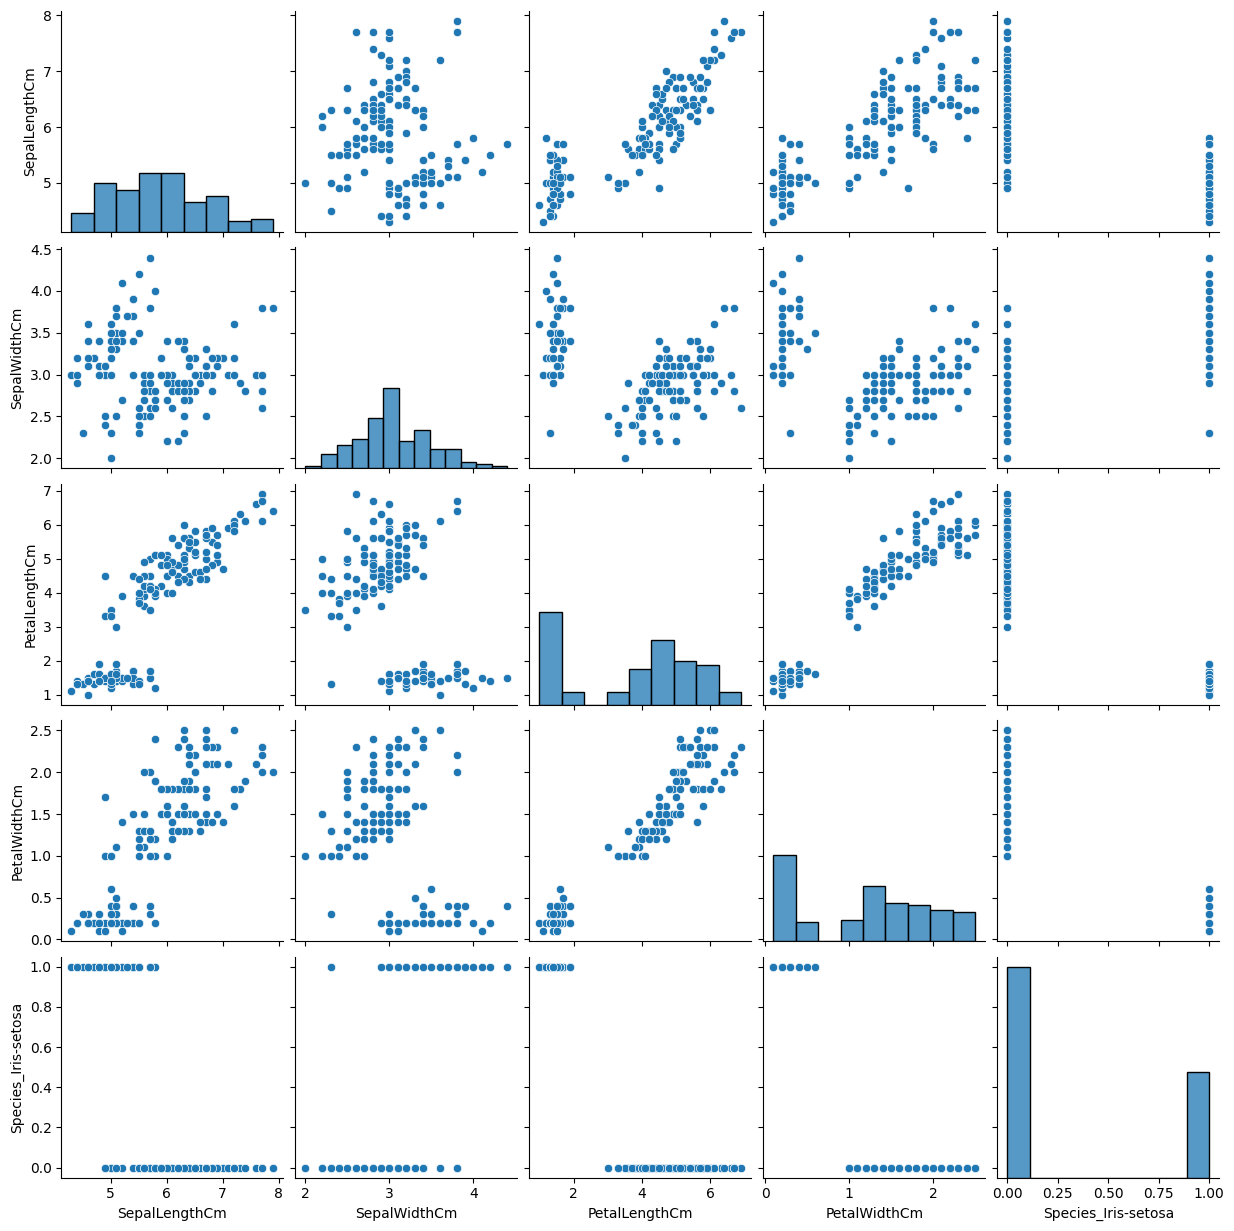

In [259]:
# Plot the distribution of the data
# sns.pairplot(data=df_corr, hue='Species_Iris-setosa')
sns.pairplot(data=df_corr)

As half of the features do not follow a Gaussian (normal) distribution. Min-max scaling (normalisation) is used instead of Standardisation. 

Independent features follow Gaussian (normal) distribution:
<ul>
<li>SepalLengthCm</li>
<li>SepalWidthCm</li>
</ul>

Independent features do not follow Gaussian (normal) distribution:
<ul>
<li>PetalLengthCm</li>
<li>PetalWidthCm</li>
</ul>

In [260]:
# Fit the scaler on train data
sc = MinMaxScaler()   # StandardScaler / MinMaxScaler
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


### Fit the model on the training data


In [261]:
# Print first 5 rows
print(X_feature[:5])

#df.head()

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [262]:
# Initialize the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.ravel())

# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

### Measuring Model Performance with a confusion matrix, which compares the predicted labels to the actual labels (gold labels)

From the confusion matrix below, we can see that the model made 100% correct prediction on the test data, no False positive or False negative. Precision, recall and f1-score is 1 already, so no higher precision, or higher recall can be.

In [263]:
# use score method to get accuracy of model
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))

Accuracy: 1.0


In [264]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[20  0]
 [ 0 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 5000x1500 with 0 Axes>

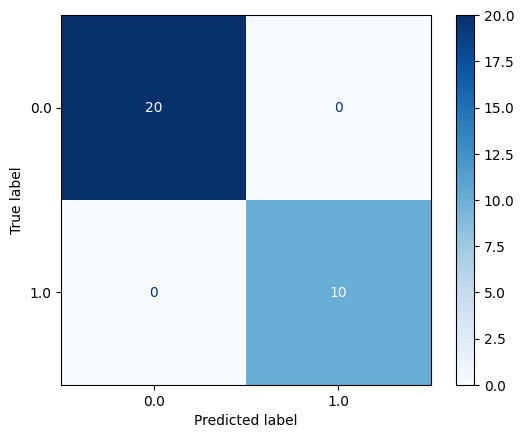

In [265]:
cm = confusion_matrix(y_pred, y_test,labels=log_reg.classes_)

# sns.heatmap can also be used to get the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')

### Make a prediction with the model

In [266]:
# predict only on a single row, provide X in order of SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
log_reg.predict(sc.transform([[4.6, 3.0, 1.4, 0.2]]))

array([1.])

### My calculation on accuracy, precision, and recall

Below is my calculation which matches the values calculated by the modules above.

In [267]:
# Write my own code to calculate the accuracy, precision, and recall

# Accuracy is (the number of True positive case + the number of True positive case) / the total number of cases
accuracy = (20 + 10) / (20 + 10 + 0 + 0)
print('Accuracy: {}'.format(accuracy))

# Precision is the number of True positive case / (the number of True positive case + the number of False positive case)
precision = 10 / (10 + 0)
print('Precision: {}'.format(precision))

# Recall is the number of True positive case / (the number of True positive case + the number of False negative case)
recall = 10 / (10 + 0)
print('Recall: {}'.format(recall))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### Optional 1: Repeat above learning but with Species as a labelled feature

Train a model with a feature having the three categories ‘Iris-setosa', 'Iris-versicolour', and 'Iris-virginica', corresponding to the numeric values 0, 1, and 2 respectively.


In [268]:
# Import the data
df = pd.read_csv("Iris.csv")

df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [269]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [270]:
# Encode ordinal categorical values
label_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

df['Species_label'] = df['Species'].map(label_mapping)

# Check the values assigned
print(df.iloc[48:53,:])
print(df.iloc[98:103,:])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species  \
48            5.3           3.7            1.5           0.2      Iris-setosa   
49            5.0           3.3            1.4           0.2      Iris-setosa   
50            7.0           3.2            4.7           1.4  Iris-versicolor   
51            6.4           3.2            4.5           1.5  Iris-versicolor   
52            6.9           3.1            4.9           1.5  Iris-versicolor   

    Species_label  
48              0  
49              0  
50              1  
51              1  
52              1  
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
98             5.1           2.5            3.0           1.1   
99             5.7           2.8            4.1           1.3   
100            6.3           3.3            6.0           2.5   
101            5.8           2.7            5.1           1.9   
102            7.1           3.0            5.9           2.1   

  

In [271]:
df.drop('Species', axis=1, inplace=True)

# Feature matrix and target vector
X_feature = df.iloc[:,0:4].values
print(X_feature[:5])

y_target = df.iloc[:,4].values
y_target = y_target.reshape(-1, 1)
print(y_target[:5])

# Split the dataset into training and testing sets by 80%/20%
# Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42, shuffle=True)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[0]
 [0]
 [0]
 [0]
 [0]]


In [272]:
# Fit the scaler on train data
sc = MinMaxScaler()   # StandardScaler / MinMaxScaler
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [273]:
# Initialize the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.ravel())

# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<Figure size 5000x1500 with 0 Axes>

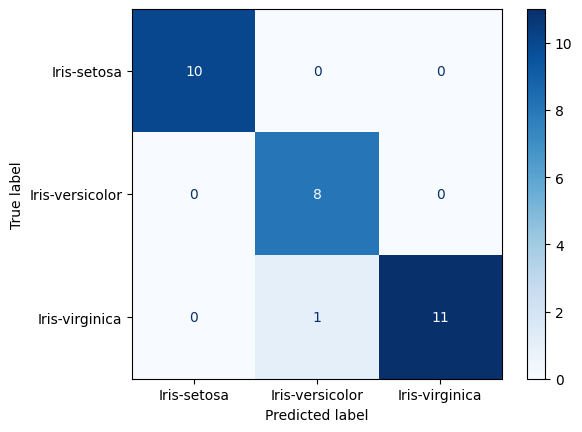

In [274]:
# use score method to get accuracy of model
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

# Show confusion matrix
cm = confusion_matrix(y_pred, y_test,labels=log_reg.classes_)

# sns.heatmap can also be used to get the confusion matrix 
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_mapping)
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')


From above Optional 1 part, there is 1 wrong case which predicts a versicolour but actually it is virginica. It is difficult to compare the accuracy of result learnt from target feature whether Setosa or not. Because the wrong case (versicolour vs virginica) is in non-Setosa case. Therefore, I try to repeat training with a feature with versicolour or non-versicolour in below part optional 2.

### Optional 2: Repeat above learning to predict whether an iris belongs to the ‘Iris-virginica' class or not only (Species_Iris-virginica)

In [275]:
# Import the data
df = pd.read_csv("Iris.csv")

df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [276]:
# Encode categorical features using one-hot encoding for nominal variables
# data = pd.get_dummies(data, columns=object_columns, drop_first=True)
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(df[['Species']]).toarray()

data_encoded_df = pd.DataFrame(
    data_encoded, columns=encoder.get_feature_names_out()
)

df.drop(object_columns, axis=1, inplace=True)

df = pd.concat([df, data_encoded_df], axis=1)

In [277]:
# df.head()
df.iloc[98:103, :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
98,5.1,2.5,3.0,1.1,0.0,1.0,0.0
99,5.7,2.8,4.1,1.3,0.0,1.0,0.0
100,6.3,3.3,6.0,2.5,0.0,0.0,1.0
101,5.8,2.7,5.1,1.9,0.0,0.0,1.0
102,7.1,3.0,5.9,2.1,0.0,0.0,1.0


In [278]:
df.drop('Species_Iris-setosa', axis=1, inplace=True)
df.drop('Species_Iris-virginica', axis=1, inplace=True)

# Feature matrix and target vector
X_feature = df.iloc[:,0:4].values
print(X_feature[:5])

y_target = df.iloc[:,4].values
y_target = y_target.reshape(-1, 1)
print(y_target[:5])

# Split the dataset into training and testing sets by 80%/20%
# Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.2, random_state=42, shuffle=True)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [279]:
# Fit the scaler on train data
sc = MinMaxScaler()   # StandardScaler / MinMaxScaler
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [280]:
# Initialize the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.ravel())

# make predictions on test data
y_pred = log_reg.predict(X_test).reshape(-1,1)

Accuracy: 0.6666666666666666
[[19  8]
 [ 2  1]]
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79        27
         1.0       0.11      0.33      0.17         3

    accuracy                           0.67        30
   macro avg       0.51      0.52      0.48        30
weighted avg       0.83      0.67      0.73        30



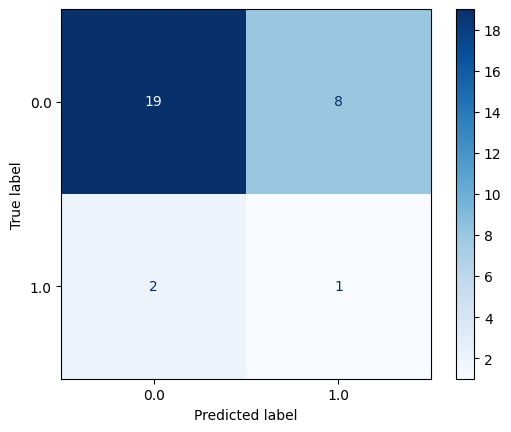

In [281]:
# use score method to get accuracy of model
score = log_reg.score(X_test, y_test)

print('Accuracy: {}'.format(score))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

# Show confusion matrix
cm = confusion_matrix(y_pred, y_test,labels=log_reg.classes_)

# sns.heatmap can also be used to get the confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot(cmap='Blues')

### Thoughts after Optional 1 and Optional 2

Compare confusion matrix between Optional 1 and Optional 2, the false positive case in Optional 2 (using target feature - versicolor or non-versicolor) is even more than that in optional 1 (labelled feature for all 3 categories). The species feature does not have order, which it should be better not to apply label encoding. However, in this case, with the current dataset not many categories in the target feature, it is not a matter.